<a href="https://colab.research.google.com/github/muskan123-sketch/Crime-rate-chicago/blob/main/Copy_of_Proj_Predict_Crime_Rate_in_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET 





# STEP #0: PROBLEM STATEMENT


- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.






- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 




# STEP #1: IMPORTING DATA

In [ ]:
!pip install fbprophet
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False,header=0,parse_dates=[0])#to ignore the errors
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False,header=0,parse_dates=[0])
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False,header=0,parse_dates=[0])


In [ ]:
chicago_df_1.shape

(334060, 23)

In [ ]:

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])#concatinating the above dataframes


In [ ]:
chicago_df.shape

(1016647, 23)

# STEP #2: EXPLORING THE DATASET  

In [ ]:

chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [ ]:
#  last elements in the training dataset
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
341779,2676146,8846671,HV520047,10/15/2012 09:20:00 PM,079XX S WENTWORTH AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,CTA BUS,False,False,623,6.0,17.0,44.0,24,1176311.0,1852426.0,2012.0,02/04/2016 06:33:39 AM,41.750410,-87.629486,"(41.750410091, -87.629486066)"
341780,2676147,8846672,HV520062,10/15/2012 09:30:00 PM,032XX W WALNUT ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,1123,11.0,28.0,27.0,18,1154913.0,1901450.0,2012.0,02/04/2016 06:33:39 AM,41.885392,-87.706588,"(41.88539198, -87.706588331)"
341781,2676148,8846673,HV520025,10/15/2012 08:52:22 PM,010XX E 132ND ST,051A,ASSAULT,AGGRAVATED: HANDGUN,CHA PARKING LOT/GROUNDS,False,False,533,5.0,9.0,54.0,04A,1185758.0,1818038.0,2012.0,02/04/2016 06:33:39 AM,41.655828,-87.595947,"(41.655827919, -87.595947243)"
341782,2676149,8846674,HV520039,10/15/2012 08:40:00 PM,060XX N WINTHROP AVE,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,RESIDENTIAL YARD (FRONT/BACK),False,False,2433,24.0,48.0,77.0,03,1167770.0,1940175.0,2012.0,02/04/2016 06:33:39 AM,41.991388,-87.658255,"(41.991387838, -87.658255326)"
341783,2676150,8846675,HV519926,10/15/2012 07:38:00 PM,019XX W 87TH ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,2221,22.0,21.0,71.0,04B,1165111.0,1846973.0,2012.0,02/04/2016 06:33:39 AM,41.735690,-87.670682,"(41.735690345, -87.67068193)"
341784,2676151,8846676,HV520015,10/15/2012 08:40:00 PM,060XX S JUSTINE ST,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,APARTMENT,False,False,713,7.0,15.0,67.0,03,1167038.0,1864623.0,2012.0,02/04/2016 06:33:39 AM,41.784083,-87.663118,"(41.784083405, -87.663118324)"
341785,2676152,8846677,HV519786,10/14/2012 03:00:00 PM,017XX N BISSELL ST,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,1813,18.0,43.0,7.0,06,1169883.0,1911721.0,2012.0,02/04/2016 06:33:39 AM,41.913263,-87.651316,"(41.913263064, -87.651316077)"
341786,2676153,8846678,HV520011,10/15/2012 06:30:00 PM,002XX W 87TH ST,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,622,6.0,21.0,44.0,26,1176442.0,1847223.0,2012.0,02/04/2016 06:33:39 AM,41.736129,-87.629162,"(41.736129473, -87.629162044)"
341787,2676154,8846679,HV519908,10/15/2012 06:45:00 PM,008XX N MICHIGAN AVE,0880,THEFT,PURSE-SNATCHING,RESTAURANT,False,False,1833,18.0,42.0,8.0,06,1177330.0,1906499.0,2012.0,02/04/2016 06:33:39 AM,41.898768,-87.624116,"(41.898767916, -87.624116333)"
341788,2676155,8846680,HV519495,10/11/2012 07:00:00 PM,011XX N CENTRAL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,True,False,1524,15.0,37.0,25.0,20,1138804.0,1907004.0,2012.0,02/04/2016 06:33:39 AM,41.900940,-87.765609,"(41.900940461, -87.76560933)"


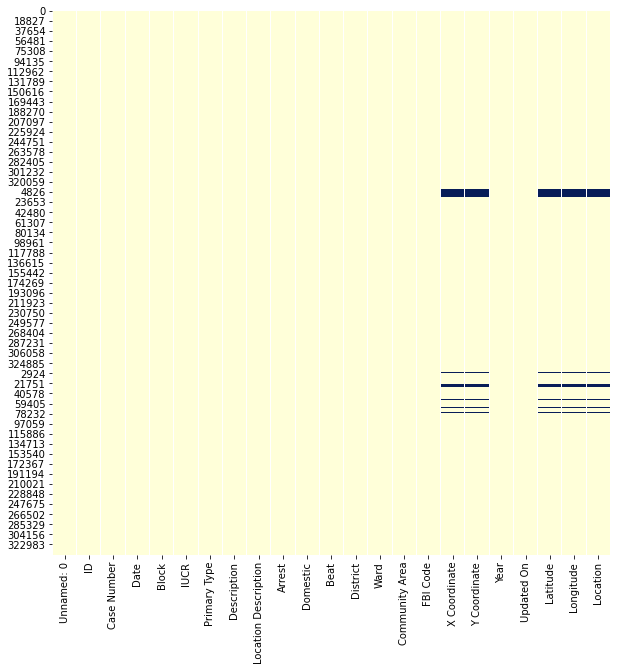

In [ ]:
#seeing how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')#we are not providing any color bar,cmap=we can select any

In [ ]:
#dropping the unnessary
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [ ]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
341794,10/14/2012 08:00:00 AM,079XX S CARPENTER ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
341795,10/15/2012 05:58:00 PM,026XX E 79TH ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
341796,10/15/2012 11:15:00 AM,079XX S DREXEL AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False
341797,10/13/2012 09:15:00 PM,108XX S WABASH AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False


In [ ]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date=pd.to_datetime(chicago_df.Date,format='%Y/%m/%d %I:%M:%S %p')


In [ ]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2012-10-14 08:00:00,2012-10-14 08:00:00,079XX S CARPENTER ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
2012-10-15 17:58:00,2012-10-15 17:58:00,026XX E 79TH ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
2012-10-15 11:15:00,2012-10-15 11:15:00,079XX S DREXEL AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False


In [ ]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [ ]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2012-10-14 08:00:00,2012-10-14 08:00:00,079XX S CARPENTER ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
2012-10-15 17:58:00,2012-10-15 17:58:00,026XX E 79TH ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
2012-10-15 11:15:00,2012-10-15 11:15:00,079XX S DREXEL AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False


In [ ]:
chicago_df['Primary Type'].value_counts() #we are seeing the value counts 

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         210227
BATTERY                       186725
CRIMINAL DAMAGE               121454
NARCOTICS                     110905
ASSAULT                        62264
OTHER OFFENSE                  60313
BURGLARY                       60034
MOTOR VEHICLE THEFT            47009
ROBBERY                        38197
DECEPTIVE PRACTICE             36535
CRIMINAL TRESPASS              28739
PROSTITUTION                   10816
WEAPONS VIOLATION              10211
PUBLIC PEACE VIOLATION          7905
OFFENSE INVOLVING CHILDREN      6569
Name: Primary Type, dtype: int64

In [ ]:
order_data=chicago_df['Primary Type'].value_counts().iloc[:15].index

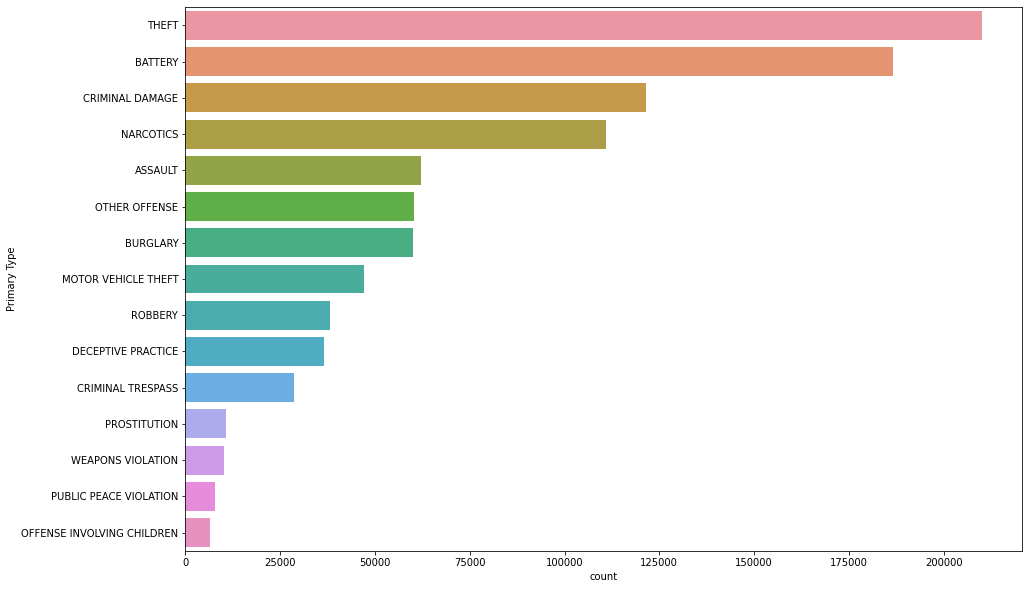

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_df,order=order_data)

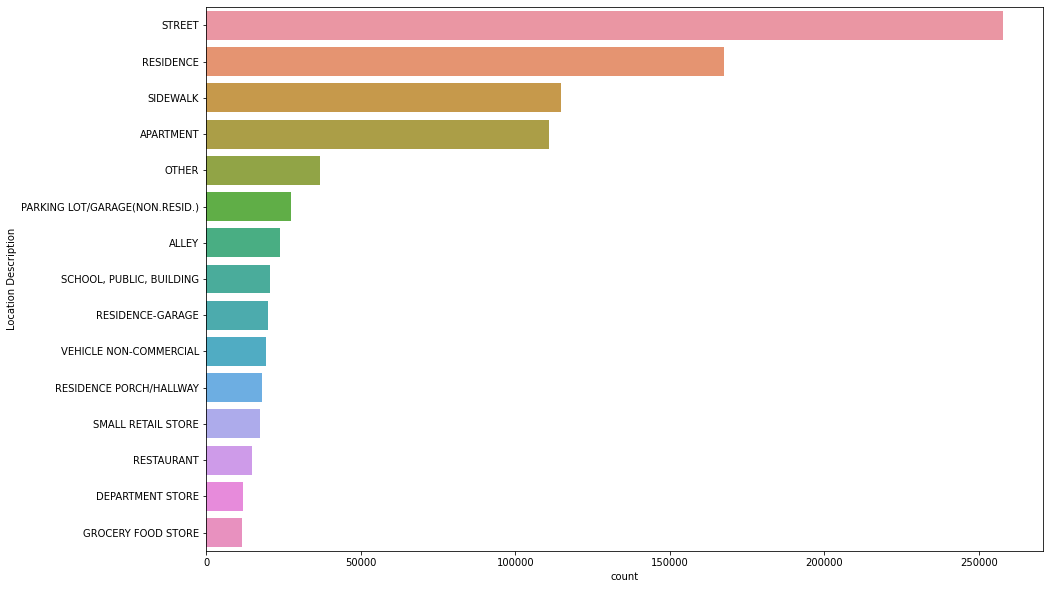

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
#we want to count how many of these crimes occur on a yearly basis
chicago_df.resample('Y').size()

Date
2005-12-31      1859
2006-12-31    328782
2007-12-31      3419
2008-12-31    332538
2009-12-31      6222
2010-12-31      1493
2011-12-31       535
2012-12-31    265208
2013-12-31      1946
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

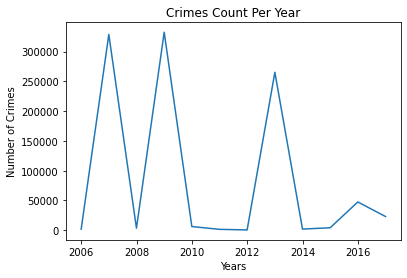

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('M').size()#crimes count per month

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
2005-06-30    40234
2005-07-31    41976
2005-08-31    41741
2005-09-30    39833
2005-10-31    40204
2005-11-30    36244
2005-12-31    33049
2006-01-31    37605
2006-02-28    34063
2006-03-31    43721
2006-04-30    69128
2006-05-31    79013
2006-06-30    77348
2006-07-31    82750
2006-08-31    80628
2006-09-30    75045
2006-10-31    76870
2006-11-30    70710
2006-12-31    67803
2007-01-31    67123
2007-02-28    53811
2007-03-31    71857
2007-04-30    70389
2007-05-31    78170
2007-06-30    55802
              ...  
2014-08-31    25802
2014-09-30    23811
2014-10-31    23911
2014-11-30    20680
2014-12-31    20891
2015-01-31    20656
2015-02-28    16287
2015-03-31    21560
2015-04-30    21610
2015-05-31    23570
2015-06-30    23059
2015-07-31    24101
2015-08-31    24685
2015-09-30    22996
2015-10-31    22979
2015-11-30    20486
2015-12-31    21006
2016-01-31    20375
2016-02-29    1

Text(0, 0.5, 'Number of Crimes')

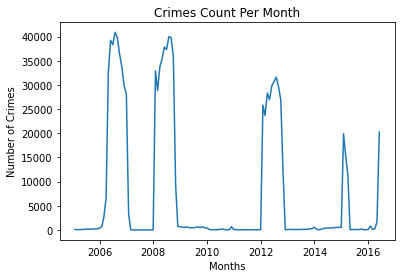

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('Q').size()#crimes count per quarter

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

Text(0,0.5,'Number of Crimes')

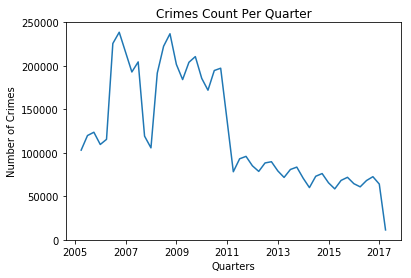

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [ ]:
chicago_prophet

,Date,0
0,2005-01-31,102
1,2005-02-28,50
2,2005-03-31,54
3,2005-04-30,80
4,2005-05-31,95
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [ ]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,102
1,2005-02-28,50
2,2005-03-31,54
3,2005-04-30,80
4,2005-05-31,95
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [ ]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,102
1,2005-02-28,50
2,2005-03-31,54
3,2005-04-30,80
4,2005-05-31,95
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


# STEP #4: MAKE PREDICTIONS

In [ ]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [ ]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds','Crime Count':'y'})

In [ ]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,102
1,2005-02-28,50
2,2005-03-31,54
3,2005-04-30,80
4,2005-05-31,95
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
m = Prophet()#instantiating the object m
m.fit(chicago_prophet_df_final)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forcasting into the future
future=m.make_future_dataframe(periods=730)#AFTER 2 YEARS
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,10978.875177,-7013.421140,25923.515097,10978.875177,10978.875177,-881.954387,-881.954387,-881.954387,-881.954387,-881.954387,-881.954387,0.0,0.0,0.0,10096.920790
1,2005-02-28,10928.842094,-7042.397523,25437.540953,10928.842094,10928.842094,-1488.068671,-1488.068671,-1488.068671,-1488.068671,-1488.068671,-1488.068671,0.0,0.0,0.0,9440.773423
2,2005-03-31,10873.448323,-7770.658984,26454.326369,10873.448323,10873.448323,-803.705140,-803.705140,-803.705140,-803.705140,-803.705140,-803.705140,0.0,0.0,0.0,10069.743183
3,2005-04-30,10819.841448,-5794.701433,29369.454325,10819.841448,10819.841448,534.583566,534.583566,534.583566,534.583566,534.583566,534.583566,0.0,0.0,0.0,11354.425015
4,2005-05-31,10764.447677,-2902.242074,30461.518834,10764.447677,10764.447677,3249.653355,3249.653355,3249.653355,3249.653355,3249.653355,3249.653355,0.0,0.0,0.0,14014.101033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2018-05-27,2146.992828,-10892.795587,20212.910627,2144.765968,2148.971026,3219.881152,3219.881152,3219.881152,3219.881152,3219.881152,3219.881152,0.0,0.0,0.0,5366.873979
863,2018-05-28,2145.171473,-11794.581802,22073.056666,2142.940614,2147.153151,3198.677227,3198.677227,3198.677227,3198.677227,3198.677227,3198.677227,0.0,0.0,0.0,5343.848700
864,2018-05-29,2143.350118,-10564.078556,22163.611622,2141.115260,2145.337261,3191.579511,3191.579511,3191.579511,3191.579511,3191.579511,3191.579511,0.0,0.0,0.0,5334.929629
865,2018-05-30,2141.528763,-11163.626440,22379.559285,2139.289906,2143.521303,3203.170288,3203.170288,3203.170288,3203.170288,3203.170288,3203.170288,0.0,0.0,0.0,5344.699051


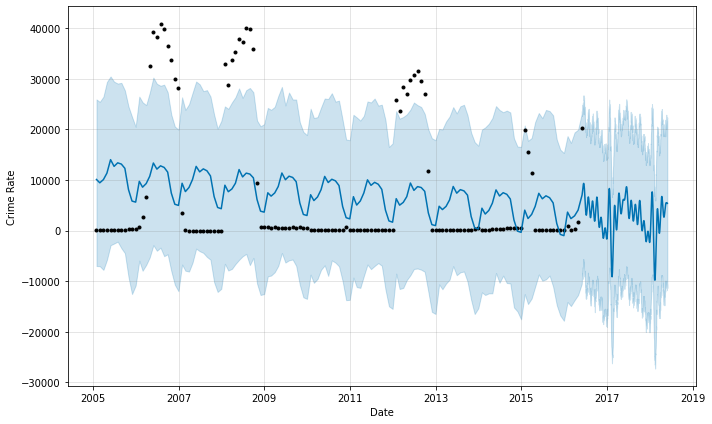

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

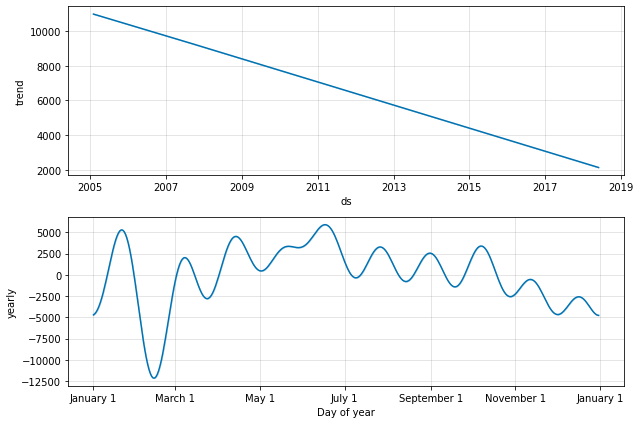

In [ ]:
figure3 = m.plot_components(forecast)